In [6]:
# Importing required packages
install.packages(c("tidyverse", "ggpubr", "broom", "ggfortify"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’




In [7]:
library(tidyverse)
library(ggpubr)
library(broom)
library(ggfortify)

In [9]:
# importing the csv file
file = "/content/mpg.csv"
data = read.csv(file, header = TRUE, sep = ",")
head(data, 5)

,X,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [14]:
#View(data)
dim(data)

[1] 234  12

In [15]:
#checking the internal structure of the data
str(data)

'data.frame':	234 obs. of  12 variables:
 $ X           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ manufacturer: chr  "audi" "audi" "audi" "audi" ...
 $ model       : chr  "a4" "a4" "a4" "a4" ...
 $ displ       : num  1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int  1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int  4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr  "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr  "f" "f" "f" "f" ...
 $ cty         : int  18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int  29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr  "p" "p" "p" "p" ...
 $ class       : chr  "compact" "compact" "compact" "compact" ...


In [16]:
# counting the missing values in the variable
sum(is.na(data))

[1] 0

In [18]:
sapply(data, function(x) sum(is.na(x)))

X manufacturer        model        displ         year          cyl 
           0            0            0            0            0            0 
       trans          drv          cty          hwy           fl        class 
           0            0            0            0            0            0

In [19]:
names(data)

[1] "X"            "manufacturer" "model"        "displ"        "year"        
 [6] "cyl"          "trans"        "drv"          "cty"          "hwy"         
[11] "fl"           "class"

In [20]:
# dropping the first column
data = data[, -1]
names(data)

[1] "manufacturer" "model"        "displ"        "year"         "cyl"         
 [6] "trans"        "drv"          "cty"          "hwy"          "fl"          
[11] "class"

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


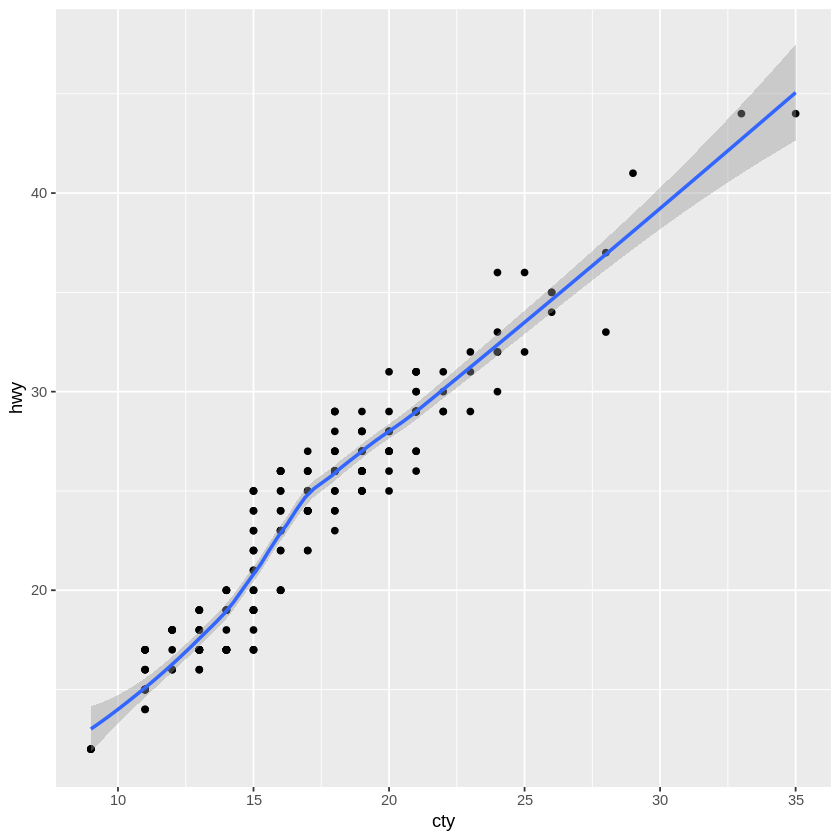

In [28]:
#plotting a scatter-plot
ggplot(data, aes(x = cty, y = hwy)) +
  geom_point() +
    stat_smooth()  # puts a regression line

In [29]:
 #Finding the correlation between the variables
cor(data$cty, data$hwy)

[1] 0.9559159

Here, we can see strong relationship between the two variables.

_________

# Simple Regression Model

In [32]:
model = lm(data = data, hwy ~ cty)

In [36]:
model


Call:
lm(formula = hwy ~ cty, data = data)

Coefficients:
(Intercept)          cty  
      0.892        1.337  


`geom_smooth()` using formula = 'y ~ x'


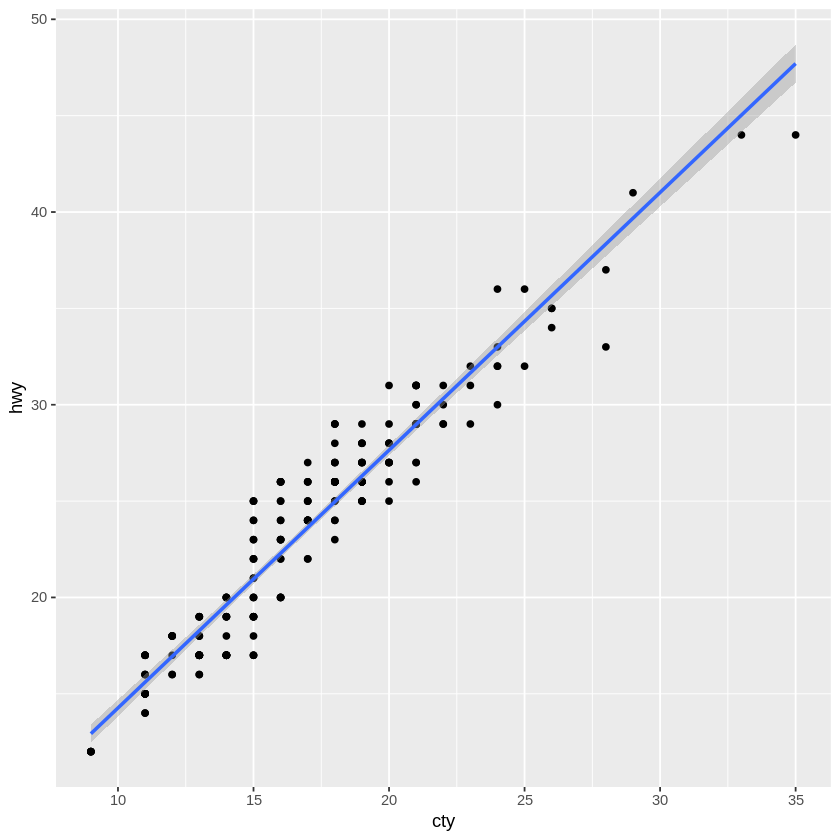

In [34]:
#plotting a scatter-plot
ggplot(data, aes(x = cty, y = hwy)) +
  geom_point() +
    stat_smooth(method = lm)  # puts a regression line

Here, we can also see the confidence interval boundry around the line.

------

## Checking the quality of our SLR model

In [35]:
summary(model)


Call:
lm(formula = hwy ~ cty, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3408 -1.2790  0.0214  1.0338  4.0461 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.89204    0.46895   1.902   0.0584 .  
cty          1.33746    0.02697  49.585   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.752 on 232 degrees of freedom
Multiple R-squared:  0.9138,	Adjusted R-squared:  0.9134 
F-statistic:  2459 on 1 and 232 DF,  p-value: < 2.2e-16


In [37]:
# calculating confidence interval for the coefficients
confint(model)

,2.5 %,97.5 %
(Intercept),-0.03189534,1.815978
cty,1.28431197,1.390599


In [38]:
# calculating the prediction error of the fitted model
sigma(model) * 100 / mean(data$hwy)

[1] 7.475581

# Model Prediction

In [39]:
# finding the fitted values of our model
fitted = predict.lm(model)

In [41]:
head(fitted, 3)

1        2        3 
24.96624 28.97861 27.64115

In [42]:
model_diag_metrics = augment(model)

In [43]:
head(model_diag_metrics, 6)

hwy,cty,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
29,18,24.96624,4.03375791,0.004581995,1.735813,1.225242e-02,2.30728553
29,21,28.97861,0.02139108,0.008336700,1.756077,6.316693e-07,0.01225871
31,20,27.64115,3.35884669,0.006611237,1.742023,1.230788e-02,1.92320163
30,21,28.97861,1.02139108,0.008336700,1.754781,1.440152e-03,0.58533460
26,16,22.29133,3.70866914,0.004448333,1.738965,1.005228e-02,2.12119427
26,18,24.96624,1.03375791,0.004581995,1.754754,8.047109e-04,0.59130338


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'


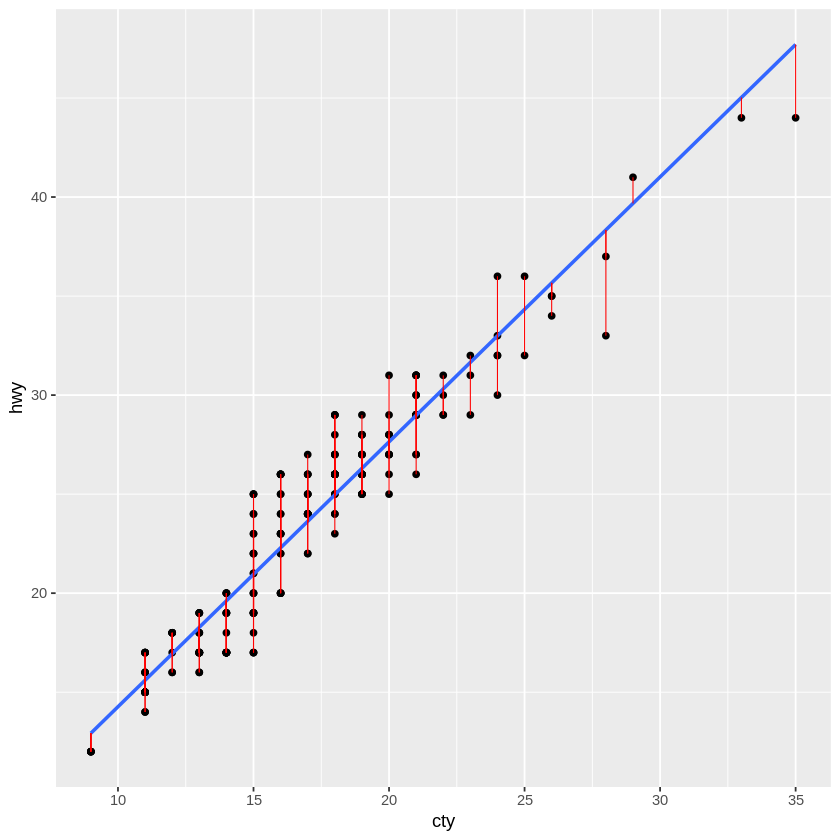

In [44]:
# Visuakizing the residuals of the fitted model
ggplot(model_diag_metrics, aes(cty, hwy)) +
  geom_point() +
    stat_smooth(method = lm, se = FALSE)+
      geom_segment(aes(xend = cty, yend = .fitted), color = "red", size = 0.3)

## Predicting new values using the model

In [47]:
# predicting new values using the model
predict(
  object = model,
  newdata = data.frame(cty = c(21,27,14))
)

1        2        3 
28.97861 37.00334 19.61642

# Checking Assumptions: Diagonistic Plots

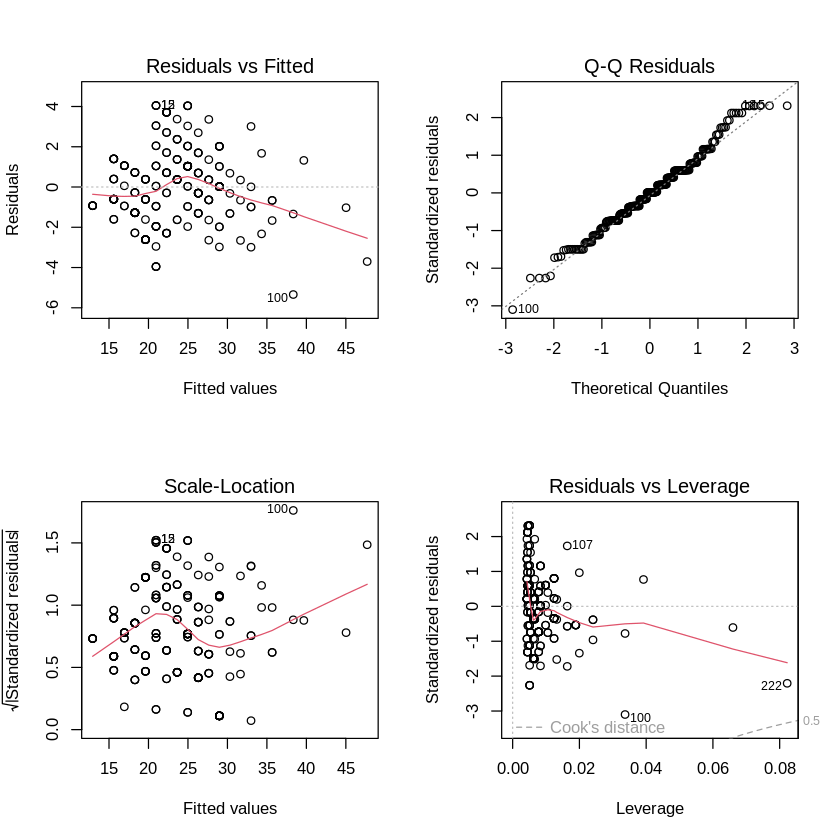

In [49]:
par(mfrow = c(2,2))
plot(model)

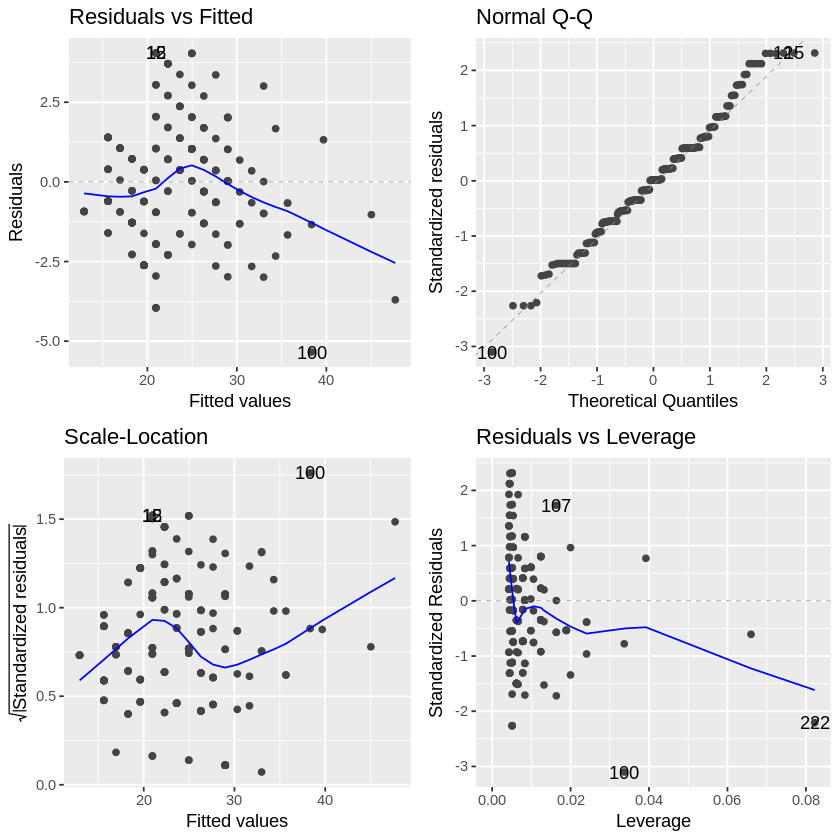

In [50]:
autoplot(model)

# Building Multiple regression Model

In [54]:
mul_reg_model = lm(data = data, hwy ~ cty + cyl)
mul_reg_model


Call:
lm(formula = hwy ~ cty + cyl, data = data)

Coefficients:
(Intercept)          cty          cyl  
   -0.07702      1.36425      0.08784  


In [55]:
summary(mul_reg_model)


Call:
lm(formula = hwy ~ cty + cyl, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4735 -1.1952  0.0398  0.9934  4.1691 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.07702    1.40888  -0.055    0.956    
cty          1.36425    0.04559  29.924   <2e-16 ***
cyl          0.08784    0.12040   0.730    0.466    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.754 on 231 degrees of freedom
Multiple R-squared:  0.914,	Adjusted R-squared:  0.9132 
F-statistic:  1227 on 2 and 231 DF,  p-value: < 2.2e-16


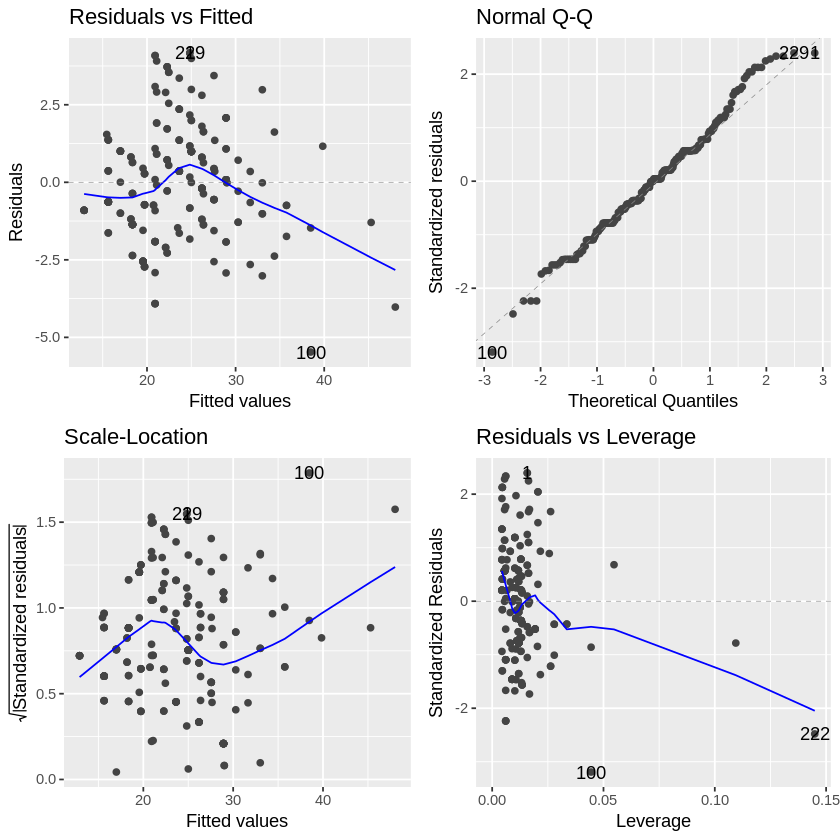

In [56]:
autoplot(mul_reg_model)

We learned how to build and interprete the result of linear regression models. We also leaned how to asses the model fully using the summary function. We also perfomred diagnostic checks to check if our model satisfies certain assumptions.
